# Beta Bank Churn Predictions

## Introduction

In this project we aim to train a prediction model for churns of Beta Bank. It will be used to identify customers with high probabilities of leaving soon.


## Data Preprocess

### Objective


The first step is to explore data and validate information. Data often comes with a few unpredicted issues, and these will be fixed in this preprocessing section.  These can include missing values, artifacts and incorrect data types. We will take a first look at the data and the information available while making sure the values are correctly loaded: numeric data should correctly be assigned as integer or float, corresponding to their values. At the end of this section, we expect to have data ready for analysis and the drawing of results.

### Code

In [1]:
import pandas as pd

path_array = ['', '/', '/datasets/', './datasets/', '../datasets/']
CSVPATH = None

for i in path_array:
    try:
        pd.read_csv(i + 'Churn.csv', nrows=1)
        CSVPATH = i
    except:
        pass

if CSVPATH:
    print('Path found is', 'current folder' if CSVPATH == '' else CSVPATH)
else:
    print('No path found')

Path found is ../datasets/


In [2]:
df = pd.read_csv(i + 'Churn.csv')

In [3]:
def optimize_types(df):
    df_dtypes = df.dtypes
    df_names = df.index
    df_types = [i.name for i in df_dtypes.values]
    df_types = dict(zip(df_names, df_types))
    return df_types

float_columns = ['Balance', 'EstimatedSalary', 'Tenure']

for col in float_columns:
    df[col] = pd.to_numeric(df[col], downcast = 'float')

int_columns = [ ]

uint_columns = [ 'RowNumber', 
                 'CustomerId', 
                 'CreditScore',
                 'CustomerId',
                 'Age',
                 'NumOfProducts']


for col in int_columns:
    df[col] = pd.to_numeric(df[col], downcast = 'integer')

for col in uint_columns:
    df[col] = pd.to_numeric(df[col], downcast = 'unsigned')

bool_columns = ['IsActiveMember',
                'Exited',
                'HasCrCard' ]

df[bool_columns] = df[bool_columns].astype('bool')
    
df_types = optimize_types(df)

df = pd.read_csv(
    CSVPATH+'Churn.csv', 
    dtype=df_types)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null uint16
CustomerId         10000 non-null uint32
Surname            10000 non-null object
CreditScore        10000 non-null uint16
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null uint8
Tenure             9091 non-null float32
Balance            10000 non-null float32
NumOfProducts      10000 non-null uint8
HasCrCard          10000 non-null bool
IsActiveMember     10000 non-null bool
EstimatedSalary    10000 non-null float32
Exited             10000 non-null bool
dtypes: bool(3), float32(3), object(3), uint16(2), uint32(1), uint8(2)
memory usage: 478.6+ KB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.000000,1,True,True,101348.882812,True
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.859375,1,False,True,112542.578125,False
2,3,15619304,Onio,502,France,Female,42,8.0,159660.796875,3,True,False,113931.570312,True
3,4,15701354,Boni,699,France,Female,39,1.0,0.000000,2,False,False,93826.632812,False
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.820312,1,True,True,79084.101562,False


In [4]:
print(f'Number of duplicated rows: {df[df.duplicated()].shape[0]}')

Number of duplicated rows: 0


In [5]:
print('Max count of same customer ID:', df['CustomerId'].value_counts().max())

Max count of same customer ID: 1


In [6]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [7]:
display(df.describe().round(2))
display(df[['Surname', 'Geography', 'Gender', 'IsActiveMember', 'Exited']].describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,9091.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.00,76485.89,1.53,100090.23
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,57510.49
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,11.58
25%,2500.75,15628528.25,584.00,32.00,2.00,0.00,1.00,51002.11
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,100193.91
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,149388.25
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,199992.48


,Surname,Geography,Gender,IsActiveMember,Exited
count,10000,10000,10000,10000,10000
unique,2932,3,2,2,2
top,Smith,France,Male,True,False
freq,32,5014,5457,5151,7963


In [8]:
print(f"Percentage of missing values in Tenure column: {df[df['Tenure'].isna()].shape[0]/df.shape[0]:.2%}" )
df['Tenure'] = pd.to_numeric(df['Tenure'].fillna(5).astype('int'), downcast='unsigned')
print('Empty Tenure values have been filled in with 5, which is both the median and the mean.')

Percentage of missing values in Tenure column: 9.09%
Empty Tenure values have been filled in with 5, which is both the median and the mean.


In [9]:
drop_cols = ['CustomerId', 'Surname']

display(df[df['RowNumber'] == 0].head())
drop_cols.append('RowNumber')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
eda_df = df
df = eda_df.drop(drop_cols, axis=1)

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

def feat_prep_ohe_scaler(indf, ohe_encoder=None, std_scaler=None):
    """
    Apply OHE and Scale on a df of strings and numbers. Object columns are automatically found and OHE is applied to them. After that, numbers are scaled. The encoder and the scaler can be manually passed, otherwise they are created.

    Output is feature-prepared DataFrame, OneHotEncoder object and StandardScaler object.
    obs: DataFrame has no object columns and the encoded objects are on the rightmost columns.
    """
    ret = 0
    df = indf
    # create encoders if None were passed
    if ohe_encoder == None:
        ohe_encoder = OneHotEncoder(handle_unknown='error', drop='first')
        ret+=1
    if std_scaler == None:
        std_scaler = StandardScaler()
        ret+=2

    # Find object and boolean variables
    object_cols = []
    bool_cols = []
    for col, dtype in zip(df.columns, df.dtypes):
        if dtype == 'object':
            object_cols.append(col)
        if dtype in ['bool']:
            bool_cols.append(col)

    # Train ohe_encoder on object columns
    ohe_encoder.fit(df[object_cols])

    # Transform and create encoded df
    ohe_encoded = pd.DataFrame(
                data=ohe_encoder.transform(df[object_cols]).toarray(), 
                columns=ohe_encoder.get_feature_names(object_cols)
    ).astype('bool')

    # backup_boolean_cols
    df_bool = df[bool_cols]
    df = df.drop(bool_cols, axis=1)

    # Leave df with numerical columns only by dropping objects and adding ohe
    df = df.drop(object_cols, axis=1)

    # Train scaler
    std_scaler.fit(df)
    
    # Transform and create scaled df
    scaler = pd.DataFrame(
        std_scaler.transform(df), 
        columns=df.columns
        )

    df = df_bool.join(scaler).join(ohe_encoded)

    return {
         0: df,
         1: [df, ohe_encoder],
         2: [df, std_scaler],
         3: [df, ohe_encoder, std_scaler]
    }[ret]
    

In [12]:
df, ohe_encoder, std_scaler = feat_prep_ohe_scaler(df)

### Results

Data has been loaded with optimized data types and no duplicates were found. Around 10% of the data has missing values for Tenure. Next, we will take a look at the distributions and prepare our datasets for model training.


## Exploratory Data Analysis



### Objective


In this section, we will plot histograms of data each plan, so we can have a general understanding of the information before training the churn prediction model. A scatterplot matrix should be plotted beforehand to check the correlations and what factors can affect our suggestions on user plans.


### Code

In [13]:
import matplotlib.pyplot as plt
from IPython.display import display

eda_df.corr()['Exited']

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.015989
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

In [14]:
countries = list(eda_df["Geography"].unique())
print(f'Locations available: {countries}', end='\n\n')

print('Location counts:')
display(eda_df['Geography'].value_counts())

print('\nCustomers by country (%), Exited by country (%):')

for country in countries:
    print(country, ': ', f'{eda_df.query("Geography == @country").shape[0]/eda_df.shape[0]:.2%}, {eda_df.query("Geography == @country and Exited == True").shape[0]/eda_df.query("Geography == @country").shape[0]:.2%}', sep='')

Locations available: ['France', 'Spain', 'Germany']

Location counts:


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Customers by country (%), Exited by country (%):
France: 50.14%, 16.15%
Spain: 24.77%, 16.67%
Germany: 25.09%, 32.44%


In [15]:
eda_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,True,True,101348.882812,True
1,2,15647311,Hill,608,Spain,Female,41,1,83807.859375,1,False,True,112542.578125,False
2,3,15619304,Onio,502,France,Female,42,8,159660.796875,3,True,False,113931.570312,True
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,False,False,93826.632812,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820312,1,True,True,79084.101562,False


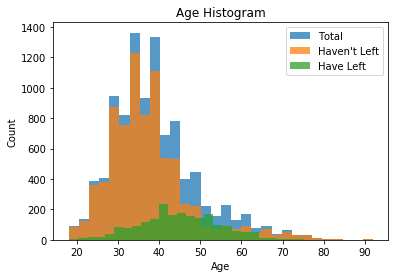

In [16]:
histogram_plots = ['Age']

title = ['Age Histogram', 'Account Balance Histogram', 'Credit Score Histogram']

exit = eda_df[eda_df['Exited'] == True].reset_index(drop=True)

no_exit = eda_df[eda_df['Exited'] == False].reset_index(drop=True)

for col, t in zip(histogram_plots, title):
    plt.figure()
    plt.hist(eda_df[col], bins=30, alpha=0.75)
    plt.hist(no_exit[col], bins=30, alpha=0.75)
    plt.hist(exit[col], bins=30, alpha=0.75)
    plt.legend(['Total', "Haven't Left", "Have Left"])
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.title(t)
    plt.show()

*Graph Analysis*

A relevant feature is the age of the customer. We can see that the distribution of age for customer who have left is significantly different than the distribution of customers in general. The mean and median age of customers who have left are close to 45 years-old, ranging from 30 to 65. Meanwhile, the average age of customers is 38 years-old and the distribution is heavily skewed to the right.

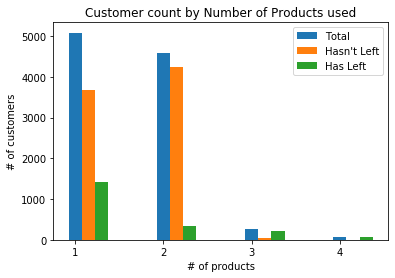

In [17]:
plt.figure()
plt.bar(eda_df['NumOfProducts'].value_counts().index, eda_df['NumOfProducts'].value_counts().values, 0.15)
plt.bar(no_exit['NumOfProducts'].value_counts().index + 0.15, no_exit['NumOfProducts'].value_counts().values, 0.15)
plt.bar(exit['NumOfProducts'].value_counts().index + 0.30, exit['NumOfProducts'].value_counts().values, 0.15)
plt.xticks([1, 2, 3, 4])
plt.title('Customer count by Number of Products used')
plt.legend(['Total', "Hasn't Left" , "Has Left"])
plt.xlabel('# of products')
plt.ylabel('# of customers')
plt.show()

*Graph Analysis*

By looking at this graph, we can see that users that use two of the products are less likely to leave, suggesting that these are the most loyal users. On the other hand, all of the customers that used more than two products have left the company, although they only count to less than 500 customers. A reason would be that these users had just started using the company services and were trying as many products as possible, but they had not felt satisfied with the overall experience.

In [18]:
def split_df(df, train=3, valid=1, test=1):
    split_size = int(df.shape[0]/(train+valid+test))
    train_df = df[0 : train*split_size].reset_index(drop=True)
    valid_df = df[train*split_size+1 : (train+valid)*split_size].reset_index(drop=True)
    test_df = df[(train+valid)*split_size+1 : df.shape[0]].reset_index(drop=True)
    return train_df, valid_df, test_df

train_df, valid_df, test_df = split_df(df)

print('Splitting dataframes in proportion: 3, 1, 1')
print('Train dataframe size:', train_df.shape[0])
print('Validation dataframe size:', valid_df.shape[0])
print('Test dataframe size:', test_df.shape[0])

Splitting dataframes in proportion: 3, 1, 1
Train dataframe size: 6000
Validation dataframe size: 1999
Test dataframe size: 1999


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

def target_features(df, tar_col, remove=[]):
    target = df[tar_col]
    remove.append(tar_col)
    features = df[[x for x in train_df.columns.values if x not in remove]]
    return target, features

In [23]:
def find_level(model, param, level=10):
    best = {
        'i': -1, 
        'score': -1
    }
    for i in range(1, level+1):
        setattr(model, param, i)
        model.fit(train_feat, train_target)
        score = model.score(valid_feat, valid_target)
        if (score - best['score']) > 0.001:
            best['score'] = score
            best['i'] = i
    return best['score'], best['i']

def report(predictions, target):
    print('Accuracy:', metrics.accuracy_score(target,predictions))
    print('Recall:', metrics.recall_score(target,predictions))
    print('Precision:', metrics.precision_score(target,predictions))

In [ ]:
# Features to remove, in order to simplify the input
train_target, train_feat = target_features(train_df, 'Exited')

valid_target, valid_feat = target_features(valid_df, 'Exited')

test_target, test_feat = target_features(test_df, 'Exited')

### Results

We have taken a look at distributions of features for each plan, and the histograms show that the patterns between users are different enough for our model to succesfully tell them apart. We have also checked the correlation of features between themselves and the chosen plans, showing that no specific feature is defining when choosing a plan. On the other hand, calls and minutes are very correlated as expected, such that we could consider reducing the number of features to produce a model that requires less input.

## Model Training

### Objective

A machine learning model is a program trained by a computer to generate output (prediction) based on input (features), by identifying patterns of data to which it has been previously exposed. This program can be configured by changing the classification methods and its settings (hyperparameters) such as the intrinsic complexity of the program, as well as the data to which it has been exposed. These models can be classifiers or regressors that can predict categorical or numerical variables respectively.

Our objective is to produce a model that can predict a plan for a user of Megaline based on patterns of previous users, so we will be using classifiers. We expect to introduce features of users each at a time (observations), and receive predictions. We will try out reducing the number of features to get a succesfull model with the least number of information from the user. To accomplish that, we will try out a few different classifiers and tune them to get the most succesful result.

### Code

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

def target_features(df, tar_col, remove=['is_ultra']):
    target = df[tar_col]
    remove.append(tar_col)
    features = df[[x for x in train_df.columns.values if x not in remove]]
    return target, features

In [61]:
def find_level(model, param, level=10):
    best = {
        'i': -1, 
        'score': -1
    }
    for i in range(1, level+1):
        setattr(model, param, i)
        model.fit(train_feat, train_target)
        score = model.score(valid_feat, valid_target)
        if (score - best['score']) > 0.001:
            best['score'] = score
            best['i'] = i
    return best['score'], best['i']

def report(predictions, target):
    print('Accuracy:', metrics.accuracy_score(target,predictions))
    print('Recall:', metrics.recall_score(target,predictions))
    print('Precision:', metrics.precision_score(target,predictions))

In [62]:
# Features to remove, in order to simplify the input
remove_list = ['calls']
train_target, train_feat = target_features(train_df, 'is_ultra', remove_list)

valid_target, valid_feat = target_features(valid_df, 'is_ultra', remove_list)

test_target, test_feat = target_features(test_df, 'is_ultra', remove_list)

KeyError: 'is_ultra'

In [ ]:
# Launching tree model and finding the ideal depth
tree_model = DecisionTreeClassifier(random_state=1995)

score, level = find_level(tree_model, 'max_depth', 100)

tree_model.max_depth = level
tree_model.fit(train_feat, train_target)

In [ ]:
# Launching linear model
linear_model = LogisticRegression(solver='liblinear')

linear_model.fit(train_feat, train_target)

In [ ]:
# Launching forest model and finding ideal number of estimators
forest_model = RandomForestClassifier(max_leaf_nodes=10, random_state=1995, 
    class_weight={
        1: 2.25,
        0: 1
    }
    )

score, level = find_level(forest_model, 'n_estimators', 20)

forest_model.n_estimators = level
forest_model.fit(train_feat, train_target)

In [ ]:
tree_predict = tree_model.predict(test_feat)

print('Report of tree model:')
report(tree_predict, test_target)

In [ ]:
print('Report of logistic model:')
report(linear_model.predict(test_feat), test_target)

In [ ]:
print('Report of Random Forest model:')
report(forest_model.predict(test_feat), test_target)

In [ ]:
print('Sanity check: when assigning ultra to all users')
report([1 for x in range(len(test_target))], test_target)

In [ ]:
print('Sanity check: when assigning smart or ultra interchangeably')
report([0 if x%2 == 0 else 1 for x in range(len(test_target)) ], test_target)

In [ ]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

print('Sanity check: when assigning smart to all users')
report([0 for x in range(len(test_target))], test_target)


In [ ]:
print('Sanity check: when assigning ultra to 2/3 of users')
report([1 if x%3 == 0 else 0 for x in range(len(test_target)) ], test_target)

In [ ]:
final_model = forest_model
importances = final_model.feature_importances_
print('The final model is a Random Forest model with 2 estimators. \nThe random state defined was 1995. \nInputs are: minutes, messages and megabytes used.\nThe importances of each feature, respectively, are', list(importances.round(2)), end='.\n\n')
report(final_model.predict(test_feat), test_target)

In [ ]:
import joblib

#dump(final_model, 'model.joblib')

OBS: Use the code line above to save the model.

### Results

We have succesfully come up with a model that can correctly predict more than 81% of the cases, while correctly identifying 70% of the Ultra users and assigning the Ultra plan for Smart users in 32% of the suggested Ultra plans. It requires as input a user's monthly needs in total call duration in minutes, number of text messages and megabytes used of internet traffic. The random forest model performed much better than the other classifiers, even with only 2 estimators. In fact, the number of estimators has been tested up to 100 estimators, and 2 estimators were enough to reach the best performance.

Sanity checks were made to confirm the results of our final model, considering that nearly 30% of the users are ultra users. The final model shows a much better result independetly.

## Conclusion

This document aimed to produce a trained machine learning model to identify the mobile carrier plans for Megaline Company. Our final model was able to reach 80% accuracy, with 80% recall and 50% precision. A higher precision means that most of the ultra plan users will be distinguished from smart users, while lower precision means more users will be suggested the ultra plan. The compromise between recall and precision can be fine tuned by restricting ultra predictions.

This model can be used to suggest user plans to new users according to their expected needs. This can either be used to reacher higher customer satisfaction rates, as well as for marketing of a plan over the other, according to the expectations of Megaline. For example, if the company would like more users to get to know the ultra plan, a lower precision means more users that marginally have smart plan behavior will be suggested the ultra plan and take look at the offers before choosing their plans.

Lastly, it is important to note that no information on ideal users of each plan has been provided as input data, such that the historical user behavior is the only factor considered when suggesting plans. Therefore, the model is most helpful in keeping the current user behavior, and it will not be as helpful if the company is not satisfacted with how users are choosing their plans.